# Interactive toolbox
1. Improve the contrast for mip
2. Overlay segmentation on top of the mip image

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import nibabel as nib
import os
from utils.eval_utils import mra_deskull, eval_scores
import cv2

### improve the contrast for mip images

In [29]:
unmasked_raw_img_path = '../document_images/prep_imgs/MASKED_sub_160um.nii.gz'
unmasked_raw_img_arr = nib.load(unmasked_raw_img_path).get_fdata()
# mask_path = "../py_data/masks/mask_160um.nii.gz"
# mask_arr = nib.load(mask_path).get_fdata()
# masked_seg_path = "../saved_imgs/test_1006_newTTA_augModeOn_160um_a/MASKED_sub_160um.nii.gz"
# masked_seg_arr = nib.load(masked_seg_path).get_fdata()

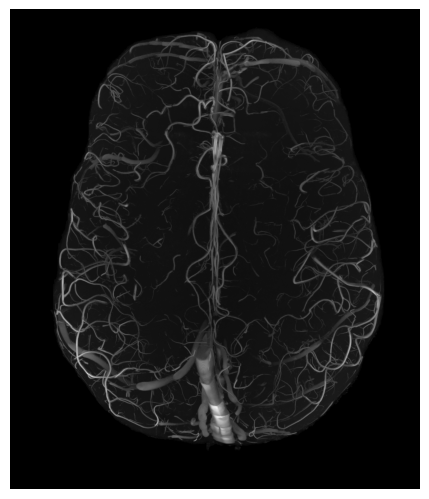

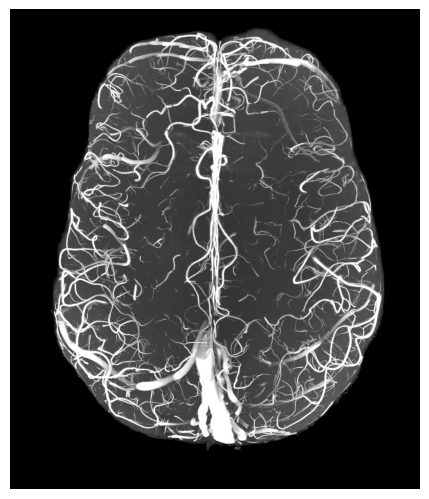

In [31]:
# masked_raw_img_arr = np.multiply(unmasked_raw_img_arr, mask_arr)
masked_raw_img_arr = unmasked_raw_img_arr

img_mip = np.max(masked_raw_img_arr, axis=2)
img_mip = np.rot90(img_mip, k=1, axes=(0,1))

img_mip_normalized = img_mip / 255
contrast_factor = 0.20
img_mip_adjusted = (img_mip_normalized - 0.5) * contrast_factor + 0.5
img_mip_adjusted = np.clip(img_mip_adjusted, 0, 1)
img_mip_adjusted = (img_mip_adjusted * 255).astype(np.uint8)

plt.figure()
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(img_mip, cmap='gray')
# plt.imsave('../document_images/ANZ/Angio_prep_160um_mip_withSkull.jpg', img_mip, cmap='gray')

plt.figure()
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(img_mip_adjusted, cmap='gray')
plt.imsave('../document_images/conup_mips/Angio_conup_160um_mip.jpg', img_mip_adjusted, cmap='gray')


### Overlay segmentation on top of the mip image

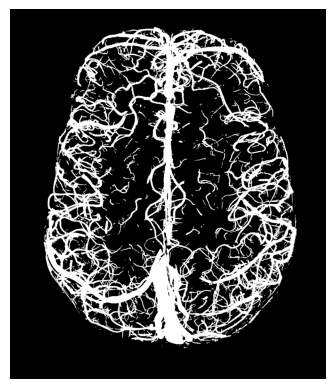

In [13]:
masked_seg_arr_mip = np.max(masked_seg_arr, axis=2)
masked_seg_arr_mip = np.rot90(masked_seg_arr_mip, k=1, axes=(0,1))

plt.figure()
plt.axis('off')
plt.imshow(masked_seg_arr_mip, cmap='gray')
# plt.imsave('../test_images/foreground.jpg', masked_seg_arr_mip, cmap='gray')

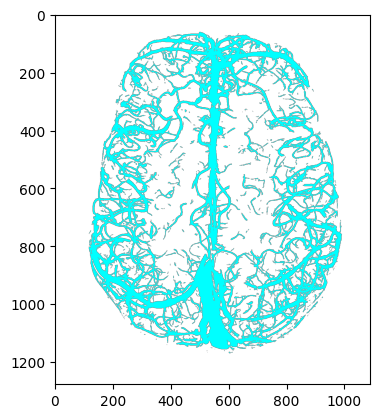

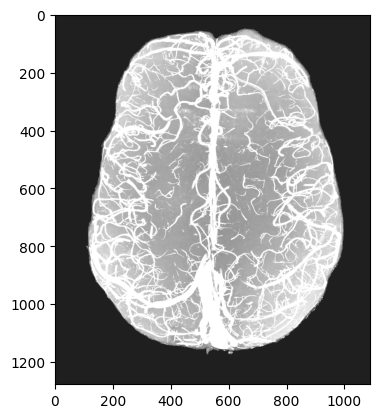

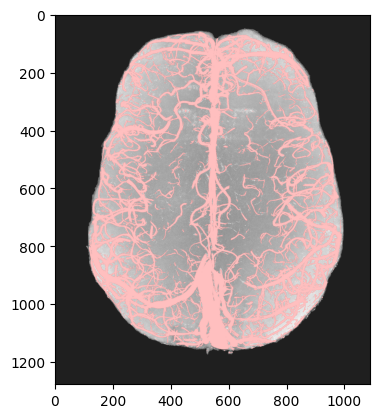

In [14]:
binary_image = masked_seg_arr_mip
background_image = img_mip_adjusted

# Assuming 'binary_image' and 'background_image' are numpy arrays of the same dimensions
# Binary image with 0s and 1s
# Background image where you want to overlay

# Create an empty RGBA image with the same dimensions as the binary image
rgba_image = np.zeros((*binary_image.shape[:2], 4), dtype=np.uint8)

# Set the alpha channel based on the binary image (0s are transparent, 1s are opaque)
rgba_image[..., 3] = (binary_image * 255).astype(np.uint8)

# Set the red color for pixels with value 1 in the binary image
rgba_image[..., 0] = binary_image * 0  # Red channel
rgba_image[..., 1] = binary_image * 255  # Red channel
rgba_image[..., 2] = binary_image * 255  # Red channel

# Create a grayscale RGBA background with a fully opaque alpha channel
background_rgba = np.zeros((*binary_image.shape[:2], 4), dtype=np.uint8)
background_rgba[..., 0] = background_image  # Set the grayscale value
background_rgba[..., 1] = background_image  # Set the grayscale value
background_rgba[..., 2] = background_image  # Set the grayscale value
background_rgba[..., 3] = 255  # Fully opaque alpha channel

# Define the opacity level for the red overlay
opacity = 0.5  # Adjust as needed

# Blend the binary image onto the background image
result_image = (rgba_image * opacity + background_rgba).astype(np.uint8)

plt.figure()
# plt.axis('off')
plt.imshow(rgba_image)

plt.figure()
# plt.axis('off')
plt.imshow(background_rgba)

plt.figure()
# plt.axis('off')
plt.imshow(result_image)


### Make a gif of proxy and final segmentation

In [12]:
# edit time: 16/10/2023
from PIL import Image, ImageSequence, ImageDraw, ImageFont

px_path = "../saved_imgs/test_1013_newTTA_augModeOn_160um_c/proxies/MASKED_sub_160um.jpg"
seg_path = "../saved_imgs/test_1013_newTTA_augModeOn_160um_c/MASKED_sub_160um.jpg"
gif_path = "../saved_imgs/test_1013_newTTA_augModeOn_160um_c/animation.gif"

px_image = Image.open(px_path)
seg_image = Image.open(seg_path)

# Define the font and size of the text
draw_px = ImageDraw.Draw(px_image)
draw_seg = ImageDraw.Draw(seg_image)
font = ImageFont.truetype("../fonts/arial-font/G_ari_bd.TTF", 50)
# Draw the text
draw_px.text((10, 10), "proxy", font=font, fill='white')
draw_seg.text((10, 10), "final", font=font, fill='white')

# Create a list of frames (images)
frames = [px_image, seg_image]

# Save the frames as a GIF
frames[0].save(gif_path, save_all=True, append_images=frames[1:], loop=0, duration=1000)
